In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/fact/1022.txt   
  inflating: dataset/fact/1023.txt   
  inflating: dataset/fact/1024.txt   
  inflating: dataset/fact/1025.txt   
  inflating: dataset/fact/1026.txt   
  inflating: dataset/fact/1027.txt   
  inflating: dataset/fact/1028.txt   
  inflating: dataset/fact/1029.txt   
  inflating: dataset/fact/103.txt    
  inflating: dataset/fact/1030.txt   
  inflating: dataset/fact/1031.txt   
  inflating: dataset/fact/1032.txt   
  inflating: dataset/fact/1033.txt   
  inflating: dataset/fact/1034.txt   
  inflating: dataset/fact/1035.txt   
  inflating: dataset/fact/1036.txt   
  inflating: dataset/fact/1037.txt   
  inflating: dataset/fact/1038.txt   
  inflating: dataset/fact/1039.txt   
  inflating: dataset/fact/104.txt    
  inflating: dataset/fact/1040.txt   
  inflating: dataset/fact/1041.txt   
  inflating: dataset/fact/1042.txt   
  inflating: dataset/fact/1043.txt   
  inflating: dataset/fact/1044.txt   

In [ ]:
import csv
import glob
import pandas as pd
import os

In [ ]:
dirpath = "./dataset"
outputpath = 'datasetcsv.csv'
columns_name =["news","label"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
count =0
folders_name = os.listdir(dirpath);
for folder in folders_name:
  files = os.listdir(dirpath + '/' + folder)
  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n','')
      row = {'news': text_file,'label': folder}
      csvout.writerow(row)
output.close()

In [ ]:
!pip install hazm

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,news,label
0,در انگلیس در حالی که به دلیل شیوع امیکرون، تعد...,fact
1,"دانشمندان ""موسسه تحقیقاتی اسکریپس"" آمریکا در م...",fact
2,اختلال شناختی تا چندین ماه در بازماندگان کووید...,fact
3,ویروس کرونا به جفت جنین حمله می‌کند,fact
4,افرادی که به مواد غذایی خاصی آلرژی دارند می‌ت...,fact
...,...,...
5021,تبلیغ از داروی ایرانی توسط ژاپن,fake
5022,پس تا اینجا معلوم شد که کرونا درمان قطعی دارد ...,fake
5023,استفاده از دمنوش مریم گلی و گیاه پریلا می‌توان...,fake
5024,کلا فقط اینو بدن واکسن همش علکیه حتی انگلیس م...,fake


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['news'].isnull()], '\n')
df.dropna(inplace=True)

missing values stats
news     2
label    0
dtype: int64 

some missing values
    news label
486  NaN  fact
881  NaN  fact 



In [ ]:
import hazm
import re

In [ ]:
normalizer = hazm.Normalizer()
def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)

    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)

    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)

    return text



In [ ]:
df['cleaned_news'] = df['news'].apply(cleaning)
df = df[['cleaned_news', 'label']]
df.columns = ['news', 'label']
df

,news,label
0,در انگلیس در حالی که به دلیل شیوع امیکرون، تعد...,fact
1,دانشمندان «موسسه تحقیقاتی اسکریپس» آمریکا در م...,fact
2,اختلال شناختی تا چندین ماه در بازماندگان کووید...,fact
3,ویروس کرونا به جفت جنین حمله می‌کند,fact
4,افرادی که به مواد غذایی خاصی آلرژی دارند می‌تو...,fact
...,...,...
5021,تبلیغ از داروی ایرانی توسط ژاپن,fake
5022,پس تا اینجا معلوم شد که کرونا درمان قطعی دارد ...,fake
5023,استفاده از دمنوش مریم گلی و گیاه پریلا می‌توان...,fake
5024,کلا فقط اینو بدن واکسن همش علکیه حتی انگلیس مت...,fake


fake    2513
fact    2511
Name: label, dtype: int64


<Axes: >

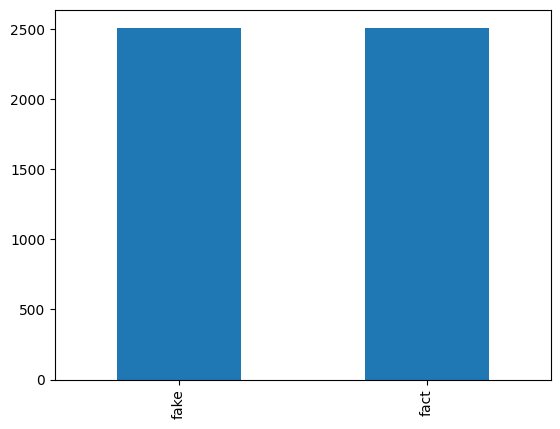

In [ ]:
count = df['label'].value_counts()

print(count)
count.plot.bar()

In [ ]:
labels = list(sorted(df['label'].unique()))
labels


['fact', 'fake']

In [ ]:
df['label_id'] = df['label'].apply(lambda t: labels.index(t))
df

,news,label,label_id
0,در انگلیس در حالی که به دلیل شیوع امیکرون، تعد...,fact,0
1,دانشمندان «موسسه تحقیقاتی اسکریپس» آمریکا در م...,fact,0
2,اختلال شناختی تا چندین ماه در بازماندگان کووید...,fact,0
3,ویروس کرونا به جفت جنین حمله می‌کند,fact,0
4,افرادی که به مواد غذایی خاصی آلرژی دارند می‌تو...,fact,0
...,...,...,...
5021,تبلیغ از داروی ایرانی توسط ژاپن,fake,1
5022,پس تا اینجا معلوم شد که کرونا درمان قطعی دارد ...,fake,1
5023,استفاده از دمنوش مریم گلی و گیاه پریلا می‌توان...,fake,1
5024,کلا فقط اینو بدن واکسن همش علکیه حتی انگلیس مت...,fake,1


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=1, stratify=df['label'])
train, valid = train_test_split(train, test_size=0.1, random_state=1, stratify=train['label'])


train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)
test = test.reset_index(drop=True)

x_train, y_train = train['news'].values.tolist(), train['label_id'].values.tolist()
x_valid, y_valid = valid['news'].values.tolist(), valid['label_id'].values.tolist()
x_test, y_test = test['news'].values.tolist(), test['label_id'].values.tolist()

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.7 MB/s eta 0:00:00


In [ ]:
from transformers import BertConfig, BertTokenizer
from transformers import TFBertModel, TFBertForSequenceClassification
from transformers import glue_convert_examples_to_features

import tensorflow as tf

In [ ]:
MAX_LEN = 128
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
TEST_BATCH_SIZE = 8

EPOCHS = 3
EEVERY_EPOCH = 1000
LEARNING_RATE = 2e-5
CLIP = 0.0

MODEL_NAME = 'HooshvareLab/bert-fa-base-uncased'

In [ ]:
label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'fact': 0, 'fake': 1}
id2label: {0: 'fact', 1: 'fake'}


In [ ]:
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
config = BertConfig.from_pretrained(
    MODEL_NAME, **{
        'label2id': label2id,
        'id2label': id2label,
    })

print(config.to_json_string())

{
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "fact",
    "1": "fake"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "fact": 0,
    "fake": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.32.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 100000
}



In [ ]:
def build_model(model_name, config, learning_rate=3e-5):
    model = TFBertForSequenceClassification.from_pretrained(model_name, config=config)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    return model
model = build_model(MODEL_NAME, config, learning_rate=LEARNING_RATE)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from tqdm.notebook import tqdm
import numpy as np
class InputExample:
    """ A single example for simple sequence classification. """

    def __init__(self, guid, text_a, text_b=None, label=None):
        """ Constructs a InputExample. """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label


def make_examples(tokenizer, x, y=None, maxlen=128, output_mode="classification", is_tf_dataset=True):
    examples = []
    y = y if isinstance(y, list) or isinstance(y, np.ndarray) else [None] * len(x)

    for i, (_x, _y) in tqdm(enumerate(zip(x, y)), position=0, total=len(x)):
        guid = "%s" % i
        label = int(_y)

        if isinstance(_x, str):
            text_a = _x
            text_b = None
        else:
            assert len(_x) == 2
            text_a = _x[0]
            text_b = _x[1]

        examples.append(InputExample(guid=guid, text_a=text_a, text_b=text_b, label=label))

    features = glue_convert_examples_to_features(
        examples,
        tokenizer,
        maxlen,
        output_mode=output_mode,
        label_list=list(np.unique(y)))

    all_input_ids = []
    all_attention_masks = []
    all_token_type_ids = []
    all_labels = []

    for f in tqdm(features, position=0, total=len(examples)):
        if is_tf_dataset:
            all_input_ids.append(tf.constant(f.input_ids))
            all_attention_masks.append(tf.constant(f.attention_mask))
            all_token_type_ids.append(tf.constant(f.token_type_ids))
            all_labels.append(tf.constant(f.label))
        else:
            all_input_ids.append(f.input_ids)
            all_attention_masks.append(f.attention_mask)
            all_token_type_ids.append(f.token_type_ids)
            all_labels.append(f.label)

    if is_tf_dataset:
        dataset = tf.data.Dataset.from_tensor_slices(({
            'input_ids': all_input_ids,
            'attention_mask': all_attention_masks,
            'token_type_ids': all_token_type_ids
        }, all_labels))

        return dataset, features

    xdata = [np.array(all_input_ids), np.array(all_attention_masks), np.array(all_token_type_ids)]
    ydata = all_labels

    return [xdata, ydata], features

In [ ]:
train_dataset_base, train_examples = make_examples(tokenizer, x_train, y_train, maxlen=128)
valid_dataset_base, valid_examples = make_examples(tokenizer, x_valid, y_valid, maxlen=128)

test_dataset_base, test_examples = make_examples(tokenizer, x_test, y_test, maxlen=128)
[xtest, ytest], test_examples = make_examples(tokenizer, x_test, y_test, maxlen=128, is_tf_dataset=False)

  0%|          | 0/3617 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/data/processors/glue.py:66: FutureWarning: This function will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("function"), FutureWarning)


  0%|          | 0/3617 [00:00<?, ?it/s]

  0%|          | 0/402 [00:00<?, ?it/s]

  0%|          | 0/402 [00:00<?, ?it/s]

  0%|          | 0/1005 [00:00<?, ?it/s]

  0%|          | 0/1005 [00:00<?, ?it/s]

  0%|          | 0/1005 [00:00<?, ?it/s]

  0%|          | 0/1005 [00:00<?, ?it/s]

In [ ]:
def get_training_dataset(dataset, batch_size):
    dataset = dataset.repeat()
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(batch_size)

    return dataset

def get_validation_dataset(dataset, batch_size):
    dataset = dataset.batch(batch_size)

    return dataset

In [ ]:
train_dataset = get_training_dataset(train_dataset_base, TRAIN_BATCH_SIZE)
valid_dataset = get_training_dataset(valid_dataset_base, VALID_BATCH_SIZE)

train_steps = len(train_examples) // TRAIN_BATCH_SIZE
valid_steps = len(valid_examples) // VALID_BATCH_SIZE


In [ ]:
r = model.fit(train_dataset,validation_data=valid_dataset,steps_per_epoch=train_steps,validation_steps=valid_steps,epochs=EPOCHS,verbose=1)

final_accuracy = r.history['val_accuracy']

print('FINAL ACCURACY: ', np.mean(final_accuracy))

Epoch 1/3
452/452 [==============================] - 194s 295ms/step - loss: 0.2142 - accuracy: 0.9206 - val_loss: 0.2383 - val_accuracy: 0.9125
Epoch 2/3
452/452 [==============================] - 112s 248ms/step - loss: 0.1006 - accuracy: 0.9671 - val_loss: 0.2860 - val_accuracy: 0.9125
Epoch 3/3
452/452 [==============================] - 112s 248ms/step - loss: 0.0499 - accuracy: 0.9848 - val_loss: 0.3189 - val_accuracy: 0.9275
FINAL ACCURACY:  0.9175000190734863


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  162841344 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 162,842,882
Trainable params: 162,842,882
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [ ]:

ev = model.evaluate(test_dataset_base.batch(8))
print()
print(f'Evaluation: {ev}')
print()


predictions = model.predict(xtest)
ypred = predictions[0].argmax(axis=-1).tolist()

print()
print(classification_report(ytest, ypred, target_names=labels))
print()

print(f'F1: {f1_score(ytest, ypred, average="weighted")}')

126/126 [==============================] - 11s 87ms/step - loss: 0.3048 - accuracy: 0.9264

Evaluation: [0.30483871698379517, 0.9263681769371033]

32/32 [==============================] - 11s 261ms/step

              precision    recall  f1-score   support

        fact       0.91      0.94      0.93       502
        fake       0.94      0.91      0.93       503

    accuracy                           0.93      1005
   macro avg       0.93      0.93      0.93      1005
weighted avg       0.93      0.93      0.93      1005


F1: 0.9263548890000848


<Axes: >

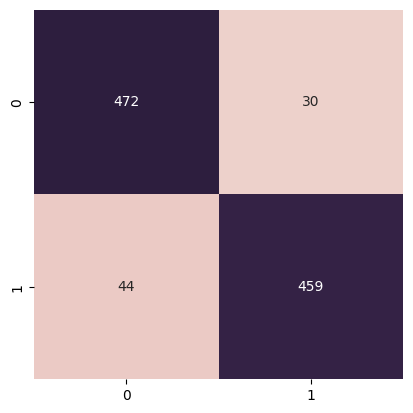

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(ytest, ypred)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)

In [ ]:
save_path = '/content/gdrive/MyDrive/ParsBertModel'

In [ ]:
model.save_pretrained(save_path)

In [ ]:
from transformers import TFBertForSequenceClassification

In [ ]:
loaded_model = TFBertForSequenceClassification.from_pretrained(save_path)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/gdrive/MyDrive/ParsBertModel.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
with open('/content/1.txt') as f:
    lines = f.readlines()

In [ ]:
print(lines)

['در حال حاضر ۰ شهرستان وضعیت قرمز، ۱۱ شهر در وضعیت نارنجی، ۱۴۶ شهر در وضعیت زرد و ۲۹۱ شهر کشور نیز در وضعیت آبی قرار دارند.']


In [ ]:
df1 = pd.DataFrame(columns=['text', 'label'])
df1.loc[0] = [lines[0], "fact"]
df1

,text,label
0,در حال حاضر ۰ شهرستان وضعیت قرمز، ۱۱ شهر در وض...,fact


In [ ]:
id_label_map = {
    'fact': 0,
    'fake': 1
}
df1['label'] = df1['label'].map(id_label_map)
df1

,text,label
0,در حال حاضر ۰ شهرستان وضعیت قرمز، ۱۱ شهر در وض...,0


In [ ]:
df1['cleaned_news'] = df1['text'].apply(cleaning)
df1 = df1[['cleaned_news', 'label']]
df1.columns = ['text', 'label']
df1

,text,label
0,در حال حاضر ۰ شهرستان وضعیت قرمز، ۱۱ شهر در وض...,0


In [ ]:
x_test1, y_test1 = df1['text'].values.tolist(), df1['label'].values.tolist()

In [ ]:
test_dataset_base1, test_examples1 = make_examples(tokenizer, x_test1, y_test1, maxlen=128)
[xtest1, ytest1], test_examples1 = make_examples(tokenizer, x_test1, y_test1, maxlen=128, is_tf_dataset=False)

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/data/processors/glue.py:66: FutureWarning: This function will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("function"), FutureWarning)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loaded_model.compile(optimizer, loss)

In [ ]:
ev = loaded_model.evaluate(test_dataset_base1.batch(8))
print()
print(f'Evaluation: {ev}')
print()

predictions = loaded_model.predict(xtest1)
ypred1 = predictions[0].argmax(axis=-1).tolist()
print(ypred1)

1/1 [==============================] - 3s 3s/step - loss: 0.0468

Evaluation: 0.04680609703063965



1/1 [==============================] - 3s 3s/step
[0]
